In [26]:
import chemistry_vae_selfies
import data_loader
import selfies
import torch
import importlib
import yaml
import pandas as pd
import numpy as np
import torch.distributions as dist
import matplotlib.pyplot as plt
import networkx as nx
from pysmiles import read_smiles
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
from rdkit import DataStructs
import auxiliary_functions as af
import importlib
import binary_loader

In [3]:
importlib.reload(af) 


<module 'auxiliary_functions' from '/users/sgccook3/DM_chems/VAE_sandbox/auxiliary_functions.py'>

In [5]:
# here we want to read in data and tranform them into one_hot
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

folder_path = "./datasets/"
file_name = "SelectedSMILES_QM9.txt"

full_path = folder_path + file_name

selfies_list, selfies_alphabet, largest_selfies_len, smiles_list, smiles_alphabet, largest_smiles_len = chemistry_vae_selfies.get_selfie_and_smiles_encodings_for_dataset(full_path)


{'H': 1, 'F': 1, 'Cl': 1, 'Br': 1, 'I': 1, 'B': 3, 'B+1': 2, 'B-1': 4, 'O': 2, 'O+1': 3, 'O-1': 1, 'N': 3, 'N+1': 4, 'N-1': 2, 'C': 4, 'C+1': 5, 'C-1': 3, 'P': 5, 'P+1': 6, 'P-1': 4, 'S': 6, 'S+1': 7, 'S-1': 5, '?': 8}
--> Translating SMILES to SELFIES...
Finished translating SMILES to SELFIES.


In [7]:
# define source file location
file_to_load =  "../selfies_saved_models_binary/lr_0.002427375401692564_KLD_0.007/"
# training file name encoder
training_file_nameE = "100/E"
# training file name decoder
training_file_nameD = "100/D"
# load data
#load_data_trained = file_to_load + training_file_nameE
# Alphabet has 18 letters, largest molecule is 21 letters. (build this as an output function later ... )
largest_selfies_len_dataset = largest_selfies_len
largest_smiles_len_dataset = largest_smiles_len

#in_dimension = len(selfies_alphabet)*largest_selfies_len
in_dimension = len(smiles_alphabet)*largest_smiles_len



# load the trained encoder
vae_encoder = torch.load(file_to_load + training_file_nameE, map_location=torch.device('cpu')) #, map_location=torch.device(device="cpu"))
#print(vae_encoder)

# load the trained decoder
vae_decoder = torch.load(file_to_load + training_file_nameD, map_location=torch.device('cpu')) #, map_location=torch.device(device="cpu"))
#print(vae_decoder)

In [8]:
selfies_alphabet = [
    "[N]",
    "[O]",
    "[=N]",
    "[#Branch1]",
    "[Branch2]",
    "[=Branch2]",
    "[Branch1]",
    "[#Branch2]",
    "[nop]",
    "[=O]",
    "[Ring2]",
    "[Ring1]",
    "[=C]",
    "[C]",
    "[#C]",
    "[#N]",
    "[F]",
    "[=Branch1]"
]

In [55]:
selfies_binary_list, _ = binary_loader.multiple_smile_to_binary(selfies_list, largest_selfies_len)

In [129]:
test_num = 0

selfie_input = selfies_list[test_num]
print(selfies.decoder(selfie_input))




C


In [130]:
test_input = selfies_binary_list[test_num]

In [131]:

x = torch.tensor(test_input)

x = x.view(1, -1).float()

print(x.size())

z =set()
vae_encoder.eval()
vae_decoder.eval()
z, mu, log_var = vae_encoder(x)

print(z.unsqueeze(0))

torch.Size([1, 645])
tensor([[[-0.5029, -0.7340,  0.7860,  0.4357, -1.2407,  0.0546,  0.6451,
           0.2072, -0.4304,  0.4663,  1.6367, -2.1132, -0.5139,  1.0664,
           0.6666,  1.7305, -0.0077,  0.6881, -0.0481, -0.0312, -0.3129,
           1.3948,  0.5233, -1.0120, -0.1010, -0.3778, -1.8928, -0.6927,
          -1.0148,  0.6274, -0.6123, -0.2635, -0.2069, -0.8254, -0.5584,
          -0.1548,  0.3399, -1.5148,  1.2473,  0.2283,  0.8296, -0.1002,
           0.2228,  1.0971, -0.1974, -1.1667,  0.4198, -0.4822,  0.2551,
           0.6701]]], grad_fn=<UnsqueezeBackward0>)


In [132]:
checker1 =  af.decode_from_latentspace(vae_encoder, vae_decoder, z.unsqueeze(0), largest_smiles_len, len(selfies_alphabet), 1)


In [133]:
print(checker1)

[tensor([[0]]), tensor([[1]]), tensor([[0]]), tensor([[0]]), tensor([[0]]), tensor([[0]]), tensor([[0]]), tensor([[0]]), tensor([[0]]), tensor([[0]]), tensor([[0]]), tensor([[0]]), tensor([[0]]), tensor([[0]]), tensor([[0]]), tensor([[0]]), tensor([[0]]), tensor([[0]]), tensor([[0]]), tensor([[2]]), tensor([[0]]), tensor([[0]])]


In [134]:
selfie_from_latent_space = af.translate_selfie(checker1,selfies_alphabet)

print(selfie_from_latent_space)


[N][O][N][N][N][N][N][N][N][N][N][N][N][N][N][N][N][N][N][=N][N][N]


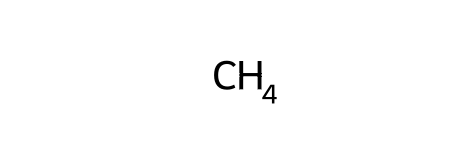

In [135]:
# Read the SMILES string




selfie_input = selfies.encoder('COC(=O)C1=CC=C(C=C1)O')

selfie_input = selfies.encoder('OC(=O)C1=CC=C(C=C1)O')

selfie_input = selfies.encoder('C(=O)C1=C(C=C1)')

selfie_input = selfies_list[test_num]

molGood = Chem.MolFromSmiles(selfies.decoder(selfie_input))

display(molGood)

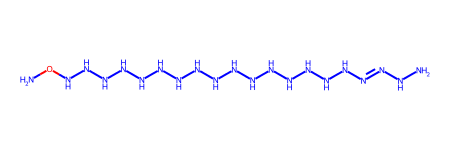

In [136]:
mol_test = Chem.MolFromSmiles(selfies.decoder(selfie_from_latent_space))

display(mol_test)